### 4.1 PageRank and HITS

Learning goal: The idea of PageRank and HITS algorithms.

Figure 1 shows the linkage structure of web pages and Table 1 lists the
keywords that occur in the pages. The task is to evaluate PageRank and
hubs and authority values of pages given a query. In this task, you can use
any of the existing PageRank and HITS (simulation) tools (you can find also
online calculators). Note that different tools may use different initialization
or scaling but the top results should be the same. If the tool allows you to
adjust the teleportation probability, use 0.10 or 0.15.

Figure 1: Linkage structure of web pages.

![image.png](linkage.png)

```
A -> B
B -> A
C -> A
C -> B
C -> D
C -> G
D -> E
E -> D
E -> G
E -> F
F -> G
H -> G
H -> I
I -> H
H -> J
I -> J
J -> I
```

Table 1: Keywords that occur in pages A–J

| id | keywords                                         |
|----|--------------------------------------------------|
| A  | authority, page, reputable, source               |
| B  | hub, page, link, good, source                    |
| C  | PageRank, HITS, ranking, algorithm               |
| D  | reputable, page, link, PageRank                  |
| E  | reputation, visit, frequency, random, surfer     |
| F  | random, surfer, trap, dead-end                   |
| G  | PageRank, teleportation, random, surfer, model   |
| H  | teleportation, travel, planet                    |
| I  | Star Trek, transporter, teleportation            |
| J  | beam, Scotty, transporter                        |



Two ranking algorithms
1. HITS = Hyperlink-Induced Topic Search = "Hubs and Authorities algorithm"
- query-dependent
- There are two types of good pages: good authority pages are reputable sources on topics and good hub pages offer links to good sources.

2. PageRank
- query-independent
- Highly reputabe pages are likely cited by other higly reputable pages.

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

(a) Evaluate PageRank values for all pages. What would be the most reputable sources containing query words (i) “PageRank” or (ii) “teleportation”?

In [3]:
# Creating the adjacency matrix for the directed graph
directed_adjacency_matrix = np.zeros((10, 10), dtype=int)

# The keywords dictionary: 

pageKeywords = {
    "A": ["authority", "page", "reputable", "source"],
    "B": ["hub", "page", "link", "good", "source"],
    "C": ["PageRank", "HITS", "ranking", "algorithm"],
    "D": ["reputable", "page", "link", "PageRank"],
    "E": ["reputation", "visit", "frequency", "random", "surfer"],
    "F": ["random", "surfer", "trap", "dead-end"],
    "G": ["PageRank", "teleportation", "random", "surfer", "model"],
    "H": ["teleportation", "travel", "planet"],
    "I": ["Star Trek", "transporter", "teleportation"],
    "J": ["beam", "Scotty", "transporter"]
}

page_indices = {
    "A": 0, "B": 1, "C": 2, "D": 3, "E": 4,
    "F": 5, "G": 6, "H": 7, "I": 8, "J": 9
}

inverse_page_indices = {v: k for k, v in page_indices.items()}

directed_links = [
    ("A", "B"), ("B", "A"), ("C", "A"), ("C", "B"), ("C", "D"), ("C", "G"),
    ("D", "E"), ("E", "D"), ("E", "G"), ("E", "F"), ("F", "G"), ("H", "G"),
    ("H", "I"), ("I", "H"), ("H", "J"), ("I", "J"), ("J", "I")
]
for src, dest in directed_links:
    directed_adjacency_matrix[page_indices[src], page_indices[dest]] = 1

# Showing the directed adjacency matrix
print("Directed adjacency matrix:\n")
print("    A | B | C | D | E | F | G | H | I | J |")
print("    _______________________________________")
for i in range(10):
    print(inverse_page_indices[i], end=" | ")
    for j in directed_adjacency_matrix[i]:
        print(j, end=" | ")
    print()
# directed_adjacency_matrix

print("\nVertical nodes name is source")
print("Horizontal nodes name is destination")

Directed adjacency matrix:

    A | B | C | D | E | F | G | H | I | J |
    _______________________________________
A | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
B | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
C | 1 | 1 | 0 | 1 | 0 | 0 | 1 | 0 | 0 | 0 | 
D | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 
E | 0 | 0 | 0 | 1 | 0 | 1 | 1 | 0 | 0 | 0 | 
F | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 
G | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 
H | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 1 | 
I | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 
J | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 

Vertical nodes name is source
Horizontal nodes name is destination


In [4]:
def pagerank(directed_adj_matrix, damping_factor=0.15, max_iter=100, tol=1e-6):
    # Number of pages
    num_pages = directed_adj_matrix.shape[0]
    
    # Initialize PageRank values
    pagerank_values = np.ones(num_pages) / num_pages
    
    # Calculate the out-degree of each page (number of outbound links)
    out_degree = directed_adj_matrix.sum(axis=1)
    
    # Iteratively calculate PageRank values
    for _ in range(max_iter):
        # Store the old PageRank values
        old_pagerank_values = pagerank_values.copy()
        
        # Calculate new PageRank values
        for i in range(num_pages):
            # Sum of PageRank values of pages linking to page i, divided by their out-degree
            inbound_pagerank = sum(pagerank_values[j] / out_degree[j] for j in range(num_pages) if directed_adj_matrix[j, i] == 1)
            
            # Calculate new PageRank value
            pagerank_values[i] = ((1 - damping_factor) / num_pages) + (damping_factor * inbound_pagerank)
        
        # Normalize PageRank values
        pagerank_values /= pagerank_values.sum()
        
        # Check for convergence
        if np.linalg.norm(pagerank_values - old_pagerank_values) < tol:
            break
    
    return pagerank_values

# Calculate PageRank values
pagerank_values = pagerank(directed_adjacency_matrix)

# Convert PageRank values to a dictionary
pagerank_dict = {inverse_page_indices[i]: pagerank_values[i] for i in range(10)}

print("The PageRank values are:")
for page, score in pagerank_dict.items():
    print(f"{page}: {score:.4f}")

The PageRank values are:
A: 0.1061
B: 0.1058
C: 0.0866
D: 0.0950
E: 0.1008
F: 0.0916
G: 0.1135
H: 0.0947
I: 0.1065
J: 0.0993


To find the most reputable sources for the query words "PageRank" and "teleportation" according to PageRank, we can filter the pages that contain these words and then look up their PageRank values in the previously calculated PageRank dictionary. The page(s) with the highest PageRank value(s) will be considered the most reputable sources.

In [83]:
def get_most_reputable_sources(query, pageKeywords, pagerank_dict):
    # Find pages that contain the query word
    pages_with_query = [page for page, keywords in pageKeywords.items() if query.lower() in map(str.lower, keywords)]
    
    # Look up their PageRank values
    pagerank_values = {page: pagerank_dict[page] for page in pages_with_query}
    
    # Identify the page(s) with the highest PageRank value(s)
    max_pagerank = max(pagerank_values.values())
    most_reputable_sources = [page for page, pr in pagerank_values.items() if pr == max_pagerank]
    
    return most_reputable_sources

# Find the most reputable sources for "PageRank" and "teleportation"
most_reputable_PageRank = get_most_reputable_sources("PageRank", pageKeywords, pagerank_dict)
most_reputable_teleportation = get_most_reputable_sources("teleportation", pageKeywords, pagerank_dict)

print(f"\nThe most reputable source for 'PageRank' is: Page {most_reputable_PageRank[0]}")
print(f"The most reputable source for 'teleportation' is: Page {most_reputable_teleportation[0]}")



The most reputable source for 'PageRank' is: Page G
The most reputable source for 'teleportation' is: Page I


(b) Construct the HITS graph (base set and its edges) for query “PageRank”. Include pages in the root set, all pages pointed by the root pages and all pages pointing to the root pages. Then calculate the hubs and authority values. Which page is the best authority on the topic? What about the best hub?

In [33]:
# The keywords dictionary: 

pageKeywords = {
    "A": ["authority", "page", "reputable", "source"],
    "B": ["hub", "page", "link", "good", "source"],
    "C": ["PageRank", "HITS", "ranking", "algorithm"],
    "D": ["reputable", "page", "link", "PageRank"],
    "E": ["reputation", "visit", "frequency", "random", "surfer"],
    "F": ["random", "surfer", "trap", "dead-end"],
    "G": ["PageRank", "teleportation", "random", "surfer", "model"],
    "H": ["teleportation", "travel", "planet"],
    "I": ["Star Trek", "transporter", "teleportation"],
    "J": ["beam", "Scotty", "transporter"]
}

page_indices = {
    "A": 0, "B": 1, "C": 2, "D": 3, "E": 4,
    "F": 5, "G": 6, "H": 7, "I": 8, "J": 9
}

inverse_page_indices = {v: k for k, v in page_indices.items()}

directed_links = [
    ("A", "B"), ("B", "A"), ("C", "A"), ("C", "B"), ("C", "D"), ("C", "G"),
    ("D", "E"), ("E", "D"), ("E", "G"), ("E", "F"), ("F", "G"), ("H", "G"),
    ("H", "I"), ("I", "H"), ("H", "J"), ("I", "J"), ("J", "I")
]
for src, dest in directed_links:
    directed_adjacency_matrix[page_indices[src], page_indices[dest]] = 1

In [34]:
# HITS implementation

# This includes all the pages that contain the query term. In this case, pages that contain the word "PageRank."

def root_set_func(query, pageKeywords):
    # Create the root set
    root_set = []
    for pageName in pageKeywords:
        if query in pageKeywords[pageName]:
            root_set.append(pageName)
    return root_set

root_set = root_set_func("PageRank", pageKeywords)
print("Root set for query 'PageRank':")
print(root_set)

# This includes all pages in the root set, plus any pages that point to a page in the root set (in-links), 
# and any pages that are pointed to by a page in the root set (out-links).
def base_set_func(root_set, directed_adj_graph, page_indices):
    # Create the base set
    base_set = []
    inlinks_set = []
    outlinks_set = []
    # in-links pages
    for page in root_set:
        for i in range(len(directed_adj_graph)):
            if directed_adj_graph[i][page_indices[page]] == 1:
                inlinks_set.append(inverse_page_indices[i])
    # out-links pages
    for page in root_set:
        for i in range(len(directed_adj_graph)):
            if directed_adj_graph[page_indices[page]][i] == 1:
                outlinks_set.append(inverse_page_indices[i])
    
    # Combine the root set, in-links set, and out-links set
    base_set = root_set + inlinks_set + outlinks_set

    # Remove duplicates
    inlinks_set = list(set(inlinks_set))
    outlinks_set = list(set(outlinks_set))
    base_set = list(set(base_set))

    return base_set, inlinks_set, outlinks_set

base_set, inlinks_set, outlinks_set = base_set_func(root_set, directed_adjacency_matrix, page_indices)

print("\nBase set for query 'PageRank':")
print(base_set)
print("\nIn-links set for query 'PageRank':")
print(inlinks_set)
print("\nOut-links set for query 'PageRank':")
print(outlinks_set)

Root set for query 'PageRank':
['C', 'D', 'G']

Base set for query 'PageRank':
['A', 'D', 'C', 'H', 'E', 'B', 'F', 'G']

In-links set for query 'PageRank':
['E', 'H', 'F', 'C']

Out-links set for query 'PageRank':
['A', 'D', 'E', 'B', 'G']


In [40]:
def construct_HITS_graph(base_set, directed_adj_matrix, page_indices):
    # Number of pages in the base set
    num_pages_base_set = len(base_set)
    
    # Initialize the adjacency matrix for the HITS subgraph
    hits_adj_matrix = np.zeros((num_pages_base_set, num_pages_base_set), dtype=int)
    
    # Populate the adjacency matrix
    for src_page in base_set:
        for dest_page in base_set:
            # If there is a directed link from src_page to dest_page in the original graph
            if directed_adj_matrix[page_indices[src_page], page_indices[dest_page]] == 1:
                # Set the corresponding entry in the HITS adjacency matrix to 1
                hits_adj_matrix[base_set.index(src_page), base_set.index(dest_page)] = 1
    
    return hits_adj_matrix

hits_adj_matrix = construct_HITS_graph(base_set, directed_adjacency_matrix, page_indices)


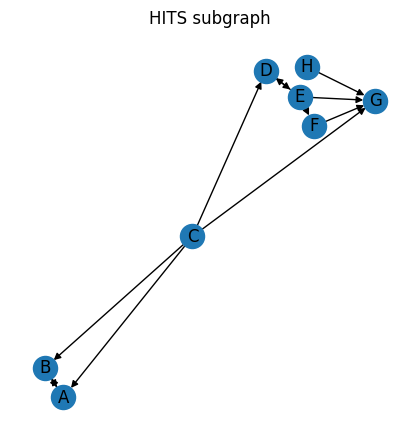

In [71]:
def draw_HITS_graph(hits_adj_matrix, base_set):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes
    for page in base_set:
        G.add_node(page)
        
    # Add edges
    for i, src_page in enumerate(base_set):
        for j, dest_page in enumerate(base_set):
            if hits_adj_matrix[i, j] == 1:
                G.add_edge(src_page, dest_page)

    plt.figure(figsize=(4, 4))  # You can adjust the size here
    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, arrows=True)
    plt.title("HITS subgraph")
    plt.show()

# Now you can call this function with the HITS adjacency matrix and the base set
draw_HITS_graph(hits_adj_matrix, base_set)

In [68]:
def hits_hub_authority_scores(hits_adj_matrix, base_set, max_iter=100, tol=1e-6):
    # Number of pages in the base set
    num_pages = len(base_set)
    
    # Initialize hub and authority scores
    hubs = np.ones(num_pages)
    authorities = np.ones(num_pages)
    
    # Iteratively calculate hub and authority scores
    for _ in range(max_iter):
        # Update authority scores
        new_authorities = np.dot(hits_adj_matrix.T, hubs)
        
        # Update hub scores
        new_hubs = np.dot(hits_adj_matrix, new_authorities)
        
        # Normalize scores
        new_hubs /= np.linalg.norm(new_hubs, 2)
        new_authorities /= np.linalg.norm(new_authorities, 2)
        
        # Check for convergence
        if np.linalg.norm(new_hubs - hubs) < tol and np.linalg.norm(new_authorities - authorities) < tol:
            break
        
        hubs, authorities = new_hubs, new_authorities
    
    # Convert hub and authority scores to dictionaries
    hub_scores = {base_set[i]: hubs[i] for i in range(num_pages)}
    authority_scores = {base_set[i]: authorities[i] for i in range(num_pages)}
    
    return hub_scores, authority_scores

hub_scores, authority_scores = hits_hub_authority_scores(hits_adj_matrix, base_set)

def nodes_highest_authority(authority_scores):
    max_authority = max(authority_scores.values())  # Find the maximum authority score
    nodes_with_highest_authority = [node for node, authority in authority_scores.items() if authority == max_authority]  # Find all nodes with the maximum authority score
    return nodes_with_highest_authority

# Assuming authority_scores is a dictionary with pages as keys and authority scores as values
nodes_with_highest_authority = nodes_highest_authority(authority_scores)
nodes_with_highest_authority


print("Hub scores:\n")
print(hub_scores)

print("\nAuthority scores:\n")
print(authority_scores)

print("\nNodes with highest authority score:\n")
print(nodes_with_highest_authority)


Hub scores:

{'A': 0.12783547930294198, 'D': 4.415502055914501e-10, 'C': 0.7201506968184191, 'H': 0.2734651576885417, 'E': 0.5469303149355331, 'B': 0.12783547930294198, 'F': 0.2734651576885417, 'G': 0.0}

Authority scores:

{'A': 0.3292458612178255, 'D': 0.49196639628304295, 'C': 0.0, 'H': 0.0, 'E': 1.137231842862259e-09, 'B': 0.3292458612178255, 'F': 0.2123550620617508, 'G': 0.7043214594820256}

Nodes with highest authority score:

['G']


In [76]:
def HITS_algorithm(query, pageKeywords, directed_adj_graph, page_indices):
    # Create the root set
    root_set = root_set_func(query, pageKeywords)
    
    # Create the base set
    base_set, inlinks_set, outlinks_set = base_set_func(root_set, directed_adj_graph, page_indices)
    
    # Construct the HITS subgraph
    hits_adj_matrix = construct_HITS_graph(base_set, directed_adj_graph, page_indices)
    
    # Calculate hub and authority scores
    hub_scores, authority_scores = hits_hub_authority_scores(hits_adj_matrix, base_set)
    
    # Find the nodes with the highest authority score
    nodes_with_highest_authority = nodes_highest_authority(authority_scores)
    
    return nodes_with_highest_authority

# Call the HITS algorithm function with the query "PageRank"
nodes_with_highest_authority = HITS_algorithm("PageRank", pageKeywords, directed_adjacency_matrix, page_indices)

print("Page with highest HITS authority score for query 'PageRank':")
print(f"{nodes_with_highest_authority[0]}: {pageKeywords[nodes_with_highest_authority[0]]}")

Page with highest HITS authority score for query 'PageRank':
G: ['PageRank', 'teleportation', 'random', 'surfer', 'model']


(c) Repeat (b) for query “teleportation”.

In [77]:
# Call the HITS algorithm function with the query "PageRank"
nodes_with_highest_authority = HITS_algorithm("teleportation", pageKeywords, directed_adjacency_matrix, page_indices)

print("Page with highest HITS authority score for query 'teleportation':")
print(f"{nodes_with_highest_authority[0]}: {pageKeywords[nodes_with_highest_authority[0]]}")

Page with highest HITS authority score for query 'teleportation':
G: ['PageRank', 'teleportation', 'random', 'surfer', 'model']


(d) Compare the results with PageRank and HITS. Do they agree on the most reputable sources?

No, PageRank and HITS do not return the same results for the query "teleportation". 

The page with the highest score is Page I according to PageRank, while the page with the highest HITS authority score is Page G.